# Identifying Gait abnormalities Machine Learning

## Using Accelrometer and Gyroscope Data

### Required Libraries

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%cd sample_data/
!pip install rarfile

/content/sample_data
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

files = os.listdir()
files


['anscombe.json',
 'README.md',
 'mnist_train_small.csv',
 'mnist_test.csv',
 'california_housing_test.csv',
 'california_housing_train.csv']

In [ ]:
from google.colab import files
import rarfile

# Upload the RAR file
uploaded = files.upload()

# Specify the RAR file name
rar_file_name = "Gait_stages.rar"

# Extract the RAR file
with rarfile.RarFile(rar_file_name, 'r') as rar_ref:
    rar_ref.extractall()

Saving Gait_stages.rar to Gait_stages.rar


## Accelerometer and Gyroscope

In [ ]:
def six_merge_csv_files(folder):
    # Create an empty list to store the dataframes
    dataframes_acc = []
    dataframes_gyr = []
    folder_path = os.path.join(os.getcwd(), folder)
    os.chdir(folder_path)

    files = os.listdir()

    csv_files_acc = [file for file in files if file.endswith('Accelerometer.csv')]
    csv_files_gyr = [file for file in files if file.endswith('Gyroscope.csv')]

    # Iterate over the folders
    for file in files:

        # Find the CSV file inside the folder
        if file in csv_files_acc:

            # Read the CSV file into a dataframe
            df_acc = pd.read_csv(file, sep='\t',usecols=lambda column: column != 'Time (s)')

            # Remove first and last 100 rows
            df_acc = df_acc.iloc[200:-200]

            # Add the dataframe to the list
            dataframes_acc.append(df_acc)

        elif file in csv_files_gyr:
             # Read the CSV file into a dataframe
            df_gyr = pd.read_csv(file, sep='\t',usecols=lambda column: column != 'Time (s)')

            # Remove first and last 100 rows
            df_gyr = df_gyr.iloc[200:-200]

            # Add the dataframe to the list
            dataframes_gyr.append(df_gyr)

    # Merge the dataframes
    merged_df_acc = pd.concat(dataframes_acc, axis=0)  # Select all columns using axis=0
    merged_df_gyr = pd.concat(dataframes_gyr, axis=0)  # Select all columns using axis=0
     # Reset the index
    merged_df_acc.reset_index(drop=True, inplace=True)
    merged_df_gyr.reset_index(drop=True, inplace=True)

    os.chdir('..')
    return pd.concat([merged_df_acc, merged_df_gyr], axis=1)


In [ ]:
df0 = six_merge_csv_files('S0')
df1 = six_merge_csv_files('S1')
df2 = six_merge_csv_files('S2')
df3 = six_merge_csv_files('S3')
df0

,Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),Gyroscope x (rad/s),Gyroscope y (rad/s),Gyroscope z (rad/s)
0,-2.379662,14.200804,0.503689,-0.069484,-0.135150,0.332759
1,-2.580061,12.492329,0.860818,-0.074065,-0.121711,0.367272
2,-2.021935,11.659028,1.436890,-0.073913,-0.117894,0.392164
3,-1.031307,11.635698,2.010569,-0.072844,-0.134386,0.411558
4,0.113659,11.889935,2.362912,-0.075592,-0.153934,0.422554
...,...,...,...,...,...,...
27066,-2.399403,8.587242,1.532603,NaN,NaN,NaN
27067,-2.062015,8.592627,1.621137,NaN,NaN,NaN
27068,-2.053640,8.750552,1.810768,NaN,NaN,NaN
27069,-2.411965,8.932407,1.880759,NaN,NaN,NaN


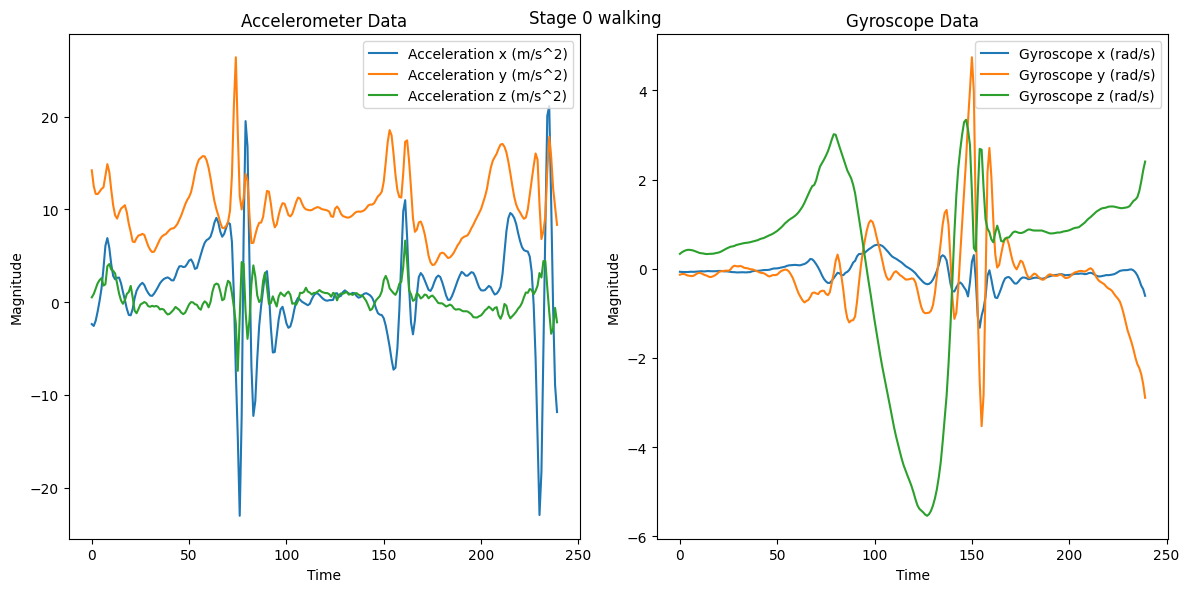

In [ ]:
# Plotting a line plot
# Plotting side by side
def plot_side_by_side(data_frame, title):
    acc_columns = filter(lambda col: col.startswith('Acc'), data_frame.columns)
    gyr_columns = filter(lambda col: col.startswith('Gyr'), data_frame.columns)

    # Create subplots with 1 row and 2 columns
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    for col in acc_columns:
        axs[0].plot(data_frame[col].head(240), label=col)
    axs[0].set_xlabel('Time')
    axs[0].set_ylabel('Magnitude')
    axs[0].set_title('Accelerometer Data')
    axs[0].legend()

    # Plot gyroscope data with legends
    for col in gyr_columns:
        axs[1].plot(data_frame[col].head(240), label=col)
    axs[1].set_xlabel('Time')
    axs[1].set_ylabel('Magnitude')
    axs[1].set_title('Gyroscope Data')
    axs[1].legend()

    # Adjust spacing between subplots
    plt.tight_layout()

    # Set the overall title
    plt.suptitle(title)

    # Show the plot
    plt.show()
plot_side_by_side(df0,'Stage 0 walking')

In [ ]:
import math

def split_dataframe(df, split_size, label):
    # Create an empty list to store the chunks
    chunks = []
    rounded_value = math.floor(len(df)/split_size)
    p=0

    # Split the dataframe into chunks of the specified size
    for i in range(0,rounded_value):
        chunk = df.iloc[p:p+split_size].copy()  # Create a copy of the chunk
          # Assign the specified label to the chunk
        chunks.append(chunk)
        p=p+split_size
    s = len(chunks)

    return chunks , s

In [ ]:
s0 , s = split_dataframe(df0,240,0)
s1 , ss = split_dataframe(df1,240,1)
s2 , sss = split_dataframe(df2,240,2)
s3 , ssss = split_dataframe(df3,240,3)

In [ ]:
ups0 , ups = split_dataframe(df0[120:],240,0)
ups1 , upss = split_dataframe(df1[120:],240,1)
ups2 , upsss = split_dataframe(df2[120:],240,2)
ups3 , upssss = split_dataframe(df3[120:],240,3)

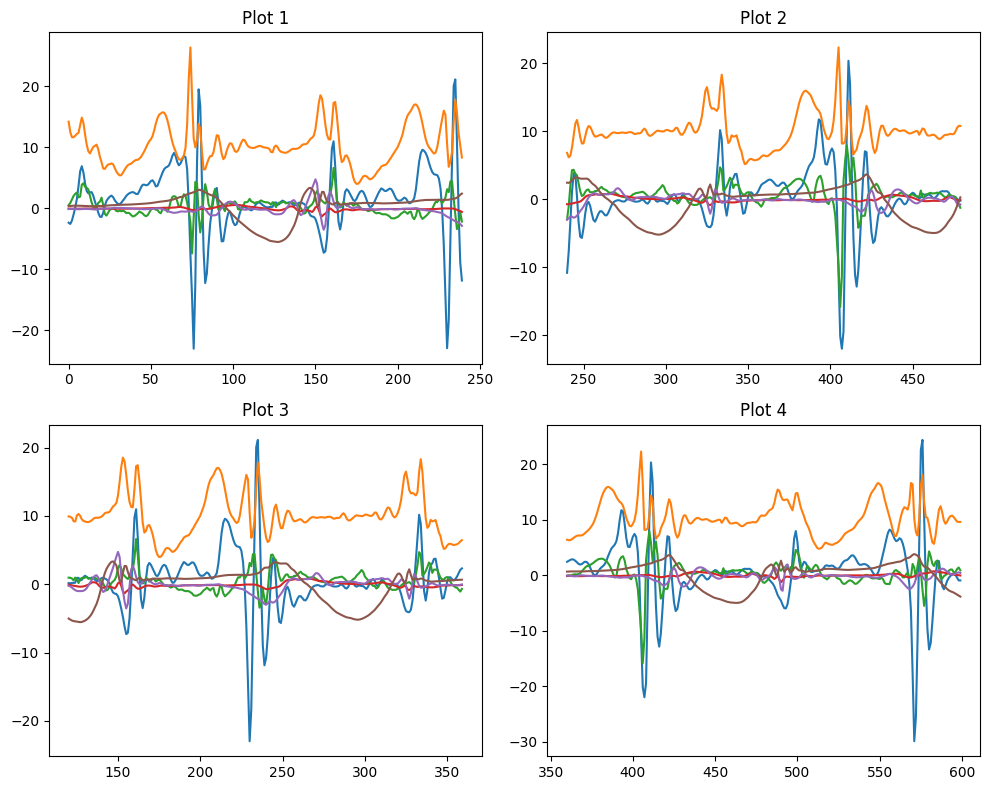

In [ ]:
# Create a figure with 2 rows and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot the first subplot
axes[0, 0].plot(s0[0])
axes[0, 0].set_title('Plot 1')

# Plot the second subplot
axes[0, 1].plot(s0[1])
axes[0, 1].set_title('Plot 2')

# Plot the third subplot
axes[1, 0].plot(ups0[0])
axes[1, 0].set_title('Plot 3')

# Plot the fourth subplot
axes[1, 1].plot(ups0[1])
axes[1, 1].set_title('Plot 4')

# Adjust the spacing between subplots
fig.tight_layout()

# Display the plots
plt.show()


In [ ]:
merged_array = np.concatenate([s0,ups0,s1,ups1,s2,ups2,s3,ups3], axis=0)
merged_array.shape

np.array(s0).shape
my_list = [0] * (s+ups) + [1] * (ss+upss) + [2] * (sss+upsss) + [3] * (ssss+upssss)

(1266, 240, 6)

In [ ]:
import random

# Define the lists to shuffle
list1 = merged_array
list2 = my_list

# Zip the lists together
zipped = list(zip(list1, list2))

# Shuffle the zipped list
random.shuffle(zipped)

# Unzip the shuffled list
X,y = zip(*zipped)

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
np.size(X_val)

# Convert X_train, X_test, y_train, y_test to NumPy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
X_val = np.array(X_val)
y_val = np.array(y_val)


In [ ]:
X_train.shape

(809, 240, 6)

In [ ]:
from tensorflow.keras import layers, models, callbacks


# Define the optimized model architecture
model = models.Sequential()
model.add(layers.Conv1D(64, kernel_size=3, activation='relu', input_shape=(240, 6)))
model.add(layers.Conv1D(32, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling1D(pool_size=3))
model.add(layers.Flatten())
model.add(layers.Dropout(0.25))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Define the early stopping callback
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, mode='min', verbose=1, restore_best_weights=True)


model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 238, 64)           1216      
                                                                 
 conv1d_13 (Conv1D)          (None, 236, 32)           6176      
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 78, 32)           0         
 1D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 2496)              0         
                                                                 
 dropout_10 (Dropout)        (None, 2496)              0         
                                                                 
 dense_93 (Dense)            (None, 16)                39952     
                                                     

Epoch 1/50
26/26 [==============================] - 2s 35ms/step - loss: 1.3899 - accuracy: 0.2781 - val_loss: 1.1692 - val_accuracy: 0.4286
Epoch 2/50
26/26 [==============================] - 1s 26ms/step - loss: 1.0853 - accuracy: 0.4042 - val_loss: 0.8940 - val_accuracy: 0.5419
Epoch 3/50
26/26 [==============================] - 1s 27ms/step - loss: 0.8489 - accuracy: 0.4808 - val_loss: 0.6755 - val_accuracy: 0.6355
Epoch 4/50
26/26 [==============================] - 1s 28ms/step - loss: 0.5911 - accuracy: 0.6885 - val_loss: 0.4697 - val_accuracy: 0.8571
Epoch 5/50
26/26 [==============================] - 1s 26ms/step - loss: 0.3965 - accuracy: 0.8863 - val_loss: 0.3081 - val_accuracy: 0.9064
Epoch 6/50
26/26 [==============================] - 1s 27ms/step - loss: 0.2587 - accuracy: 0.9283 - val_loss: 0.2304 - val_accuracy: 0.9261
Epoch 7/50
26/26 [==============================] - 1s 27ms/step - loss: 0.1988 - accuracy: 0.9382 - val_loss: 0.1857 - val_accuracy: 0.9360
Epoch 8/50
26

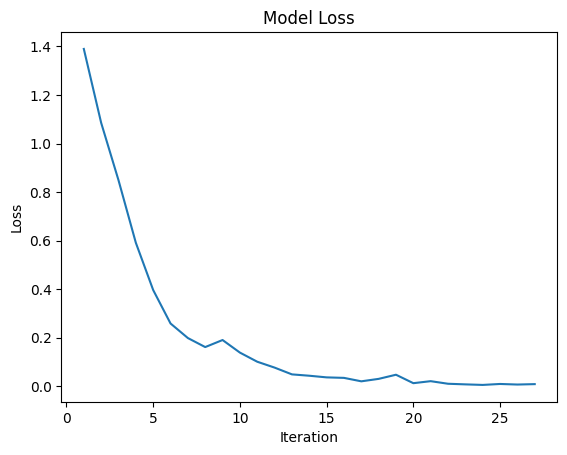

In [ ]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val),callbacks=[early_stopping])

# Get the number of iterations
iterations = np.arange(1, len(history.history['loss']) + 1)

# Plot loss vs. iterations
plt.plot(iterations, history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()


8/8 [==============================] - 0s 7ms/step - loss: 0.0740 - accuracy: 0.9882
Test Loss: 0.07399693131446838
Test Accuracy: 0.9881889820098877
8/8 [==============================] - 0s 6ms/step


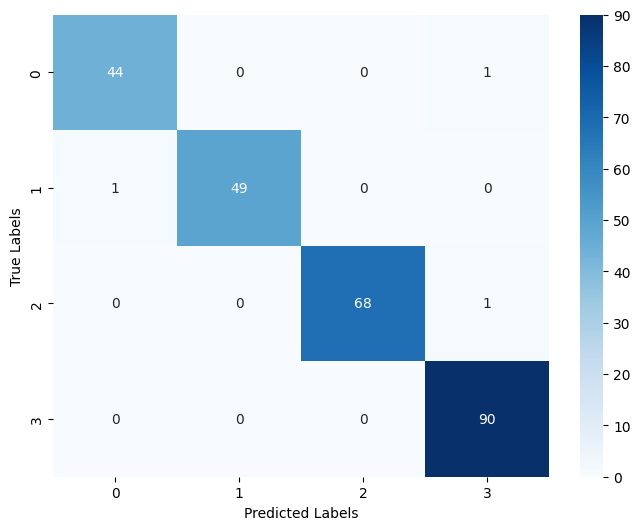

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get the predicted probabilities
y_pred_probs = model.predict(X_test)
# Get the predicted labels
y_pred = np.argmax(y_pred_probs, axis=1)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


## Model Conversion

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model to disk
open("PD_model.tflite", "wb").write(tflite_model)

basic_model_size = os.path.getsize("PD_model.tflite")
print("Model is %d bytes" % basic_model_size)

Model is 194596 bytes


## Creating C/C++ Header file for the model

In [ ]:
!echo "const unsigned char model[] = {" > /content/sample_data/model.h
!cat PD_model.tflite | xxd -i      >> /content/sample_data/model.h
!echo "};"                              >> /content/sample_data/model.h

import os
model_h_size = os.path.getsize("model.h")
print(f"Header file, model.h, is {model_h_size:,} bytes.")

Header file, model.h, is 1,200,044 bytes.


## Accelerometer

In [ ]:
def merge_csv_files(folder):
    # Create an empty list to store the dataframes
    dataframes_acc = []
    folder_path = os.path.join(os.getcwd(), folder)
    os.chdir(folder_path)

    files = os.listdir()

    csv_files_acc = [file for file in files if file.endswith('meter.csv')]

    # Iterate over the folders
    for file in csv_files_acc:

            # Read the CSV file into a dataframe
            df_acc = pd.read_csv(file, sep='\t',usecols=lambda column: column != 'Time (s)')

            # Remove first and last 200 rows
            df_acc = df_acc.iloc[200:-200]

            # Add the dataframe to the list
            dataframes_acc.append(df_acc)


    # Merge the dataframes
    merged_df_acc = pd.concat(dataframes_acc, axis=0)  # Select all columns using axis=0
     # Reset the index
    merged_df_acc.reset_index(drop=True, inplace=True)


    os.chdir('..')
    return merged_df_acc

In [ ]:
 os.listdir()

['anscombe.json',
 'README.md',
 'S1',
 'PD_model.tflite',
 'S0',
 'Gait_stages.rar',
 '.ipynb_checkpoints',
 'S2',
 'model.h',
 'S3',
 'mnist_train_small.csv',
 'mnist_test.csv',
 'california_housing_test.csv',
 'california_housing_train.csv']

In [ ]:
df0 = merge_csv_files('S0')
df1 = merge_csv_files('S1')
df2 = merge_csv_files('S2')
df3 = merge_csv_files('S3')
df0

,Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2)
0,-2.379662,14.200804,0.503689
1,-2.580061,12.492329,0.860818
2,-2.021935,11.659028,1.436890
3,-1.031307,11.635698,2.010569
4,0.113659,11.889935,2.362912
...,...,...,...
27066,-2.399403,8.587242,1.532603
27067,-2.062015,8.592627,1.621137
27068,-2.053640,8.750552,1.810768
27069,-2.411965,8.932407,1.880759


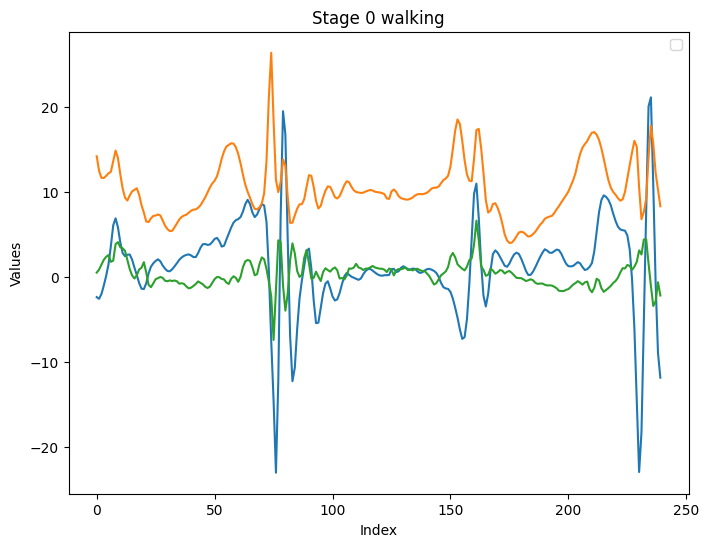

In [ ]:
def plot_side_by_side(data_frame, title):


  plt.figure(figsize=(8, 6))
  plt.plot(data_frame.head(240))
  plt.xlabel('Index')
  plt.ylabel('Values')
  plt.title(title)
  plt.legend()
  plt.show()

plot_side_by_side(df0,'Stage 0 walking')

In [ ]:
import math
def split_dataframe(df, split_size, label):
    # Create an empty list to store the chunks
    chunks = []
    rounded_value = math.floor(len(df)/split_size)
    p=0

    # Split the dataframe into chunks of the specified size
    for i in range(0,rounded_value):
        chunk = df.iloc[p:p+split_size].copy()  # Create a copy of the chunk
          # Assign the specified label to the chunk
        chunks.append(chunk)
        p=p+split_size
    s = len(chunks)

    return chunks , s

In [ ]:
s0 , s = split_dataframe(df0,240,0)
s1 , ss = split_dataframe(df1,240,1)
s2 , sss = split_dataframe(df2,240,2)
s3 , ssss = split_dataframe(df3,240,3)


In [ ]:
ups0 , ups = split_dataframe(df0[120:],240,0)
ups1 , upss = split_dataframe(df1[120:],240,1)
ups2 , upsss = split_dataframe(df2[120:],240,2)
ups3 , upssss = split_dataframe(df3[120:],240,3)

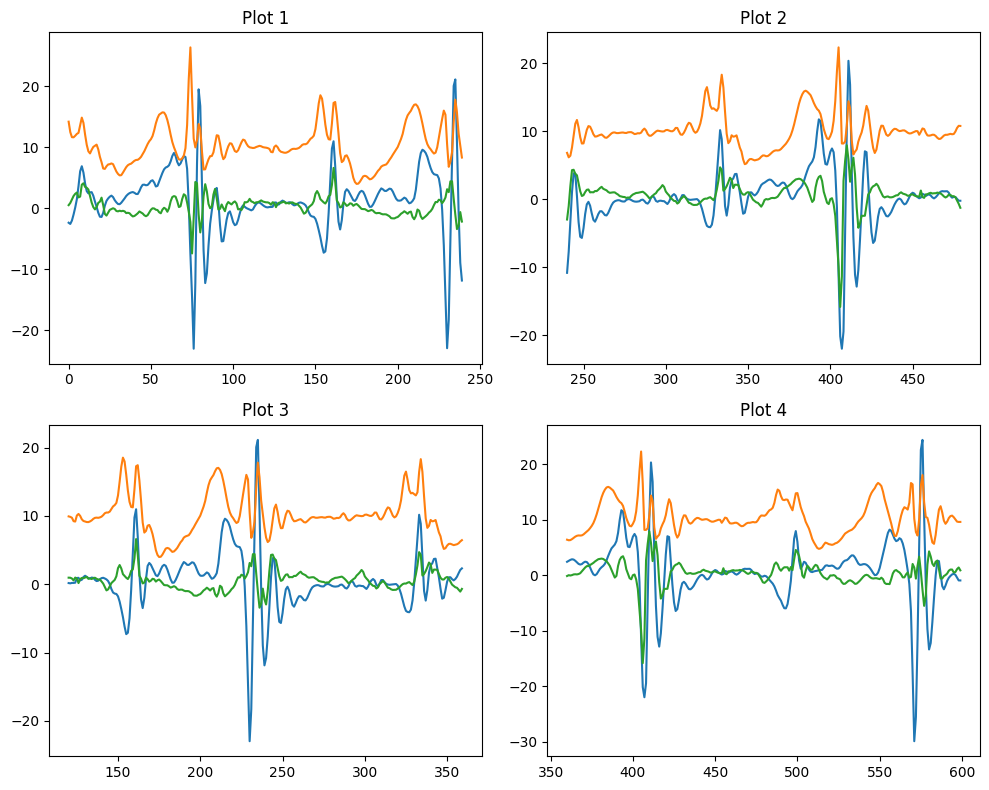

In [ ]:
# Create a figure with 2 rows and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot the first subplot
axes[0, 0].plot(s0[0])
axes[0, 0].set_title('Plot 1')

# Plot the second subplot
axes[0, 1].plot(s0[1])
axes[0, 1].set_title('Plot 2')

# Plot the third subplot
axes[1, 0].plot(ups0[0])
axes[1, 0].set_title('Plot 3')

# Plot the fourth subplot
axes[1, 1].plot(ups0[1])
axes[1, 1].set_title('Plot 4')

# Adjust the spacing between subplots
fig.tight_layout()

# Display the plots
plt.show()

In [ ]:
import random
merged_array = np.concatenate([s0,ups0,s1,ups1,s2,ups2,s3,ups3], axis=0)
merged_array.shape





(1266, 240, 3)

In [ ]:
# Define the lists to shuffle
my_list = [0] * (s+ups) + [1] * (ss+upss) + [2] * (sss+upsss) + [3] * (ssss+upssss)
list1 = merged_array
list2 = my_list

# Zip the lists together
zipped = list(zip(list1, list2))

# Shuffle the zipped list
random.shuffle(zipped)

# Unzip the shuffled list
X,y = zip(*zipped)

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
np.size(X_val)

# Convert X_train, X_test, y_train, y_test to NumPy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
X_val = np.array(X_val)
y_val = np.array(y_val)

In [ ]:
from tensorflow.keras import layers, models, callbacks


# Define the optimized model architecture
model = models.Sequential()
model.add(layers.Conv1D(64, kernel_size=3, activation='relu', input_shape=(240, 3)))
model.add(layers.Conv1D(32, kernel_size=3, activation='relu'))
model.add(layers.Conv1D(16, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling1D(pool_size=3))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Define the early stopping callback
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, mode='min', verbose=1, restore_best_weights=True)

model.summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_36 (Conv1D)          (None, 238, 64)           640       
                                                                 
 conv1d_37 (Conv1D)          (None, 236, 32)           6176      
                                                                 
 conv1d_38 (Conv1D)          (None, 234, 16)           1552      
                                                                 
 max_pooling1d_15 (MaxPoolin  (None, 78, 16)           0         
 g1D)                                                            
                                                                 
 flatten_15 (Flatten)        (None, 1248)              0         
                                                                 
 dropout_20 (Dropout)        (None, 1248)              0         
                                                     

Epoch 1/50
26/26 [==============================] - 4s 67ms/step - loss: 1.4313 - accuracy: 0.2769 - val_loss: 1.3088 - val_accuracy: 0.3498
Epoch 2/50
26/26 [==============================] - 1s 47ms/step - loss: 1.2284 - accuracy: 0.3684 - val_loss: 1.1451 - val_accuracy: 0.4778
Epoch 3/50
26/26 [==============================] - 1s 31ms/step - loss: 1.0549 - accuracy: 0.4475 - val_loss: 0.8947 - val_accuracy: 0.5320
Epoch 4/50
26/26 [==============================] - 1s 40ms/step - loss: 0.7889 - accuracy: 0.6440 - val_loss: 0.6136 - val_accuracy: 0.6995
Epoch 5/50
26/26 [==============================] - 1s 54ms/step - loss: 0.5670 - accuracy: 0.7738 - val_loss: 0.4486 - val_accuracy: 0.7882
Epoch 6/50
26/26 [==============================] - 1s 51ms/step - loss: 0.4263 - accuracy: 0.8381 - val_loss: 0.2493 - val_accuracy: 0.9409
Epoch 7/50
26/26 [==============================] - 1s 52ms/step - loss: 0.3276 - accuracy: 0.8863 - val_loss: 0.1914 - val_accuracy: 0.9557
Epoch 8/50
26

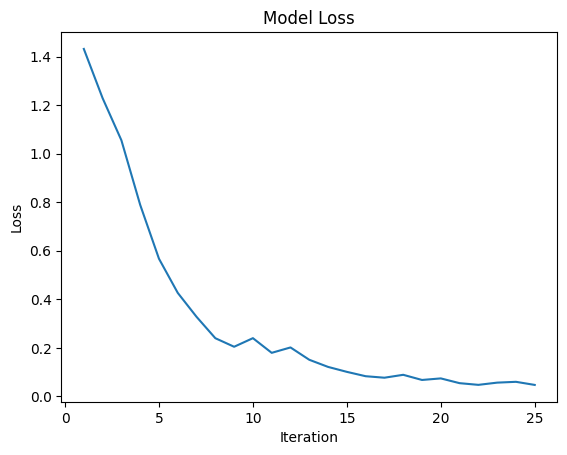

In [ ]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val),callbacks=[early_stopping])

# Get the number of iterations
iterations = np.arange(1, len(history.history['loss']) + 1)

# Plot loss vs. iterations
plt.plot(iterations, history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

8/8 [==============================] - 0s 10ms/step - loss: 0.1499 - accuracy: 0.9646
Test Loss: 0.14993582665920258
Test Accuracy: 0.9645669460296631
8/8 [==============================] - 0s 8ms/step


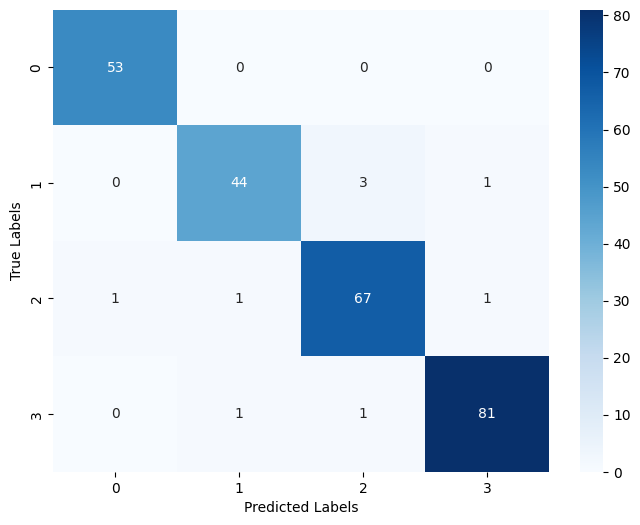

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)



import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get the predicted probabilities
y_pred_probs = model.predict(X_test)
# Get the predicted labels
y_pred = np.argmax(y_pred_probs, axis=1)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Model Conversion

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model to disk
open("PD_model.tflite", "wb").write(tflite_model)

basic_model_size = os.path.getsize("PD_model.tflite")
print("Model is %d bytes" % basic_model_size)

Model is 120636 bytes


## Creating C/C++ Header file for the model

In [ ]:
!echo "const unsigned char model[] = {" > /content/sample_data/model.h
!cat PD_model.tflite | xxd -i      >> /content/sample_data/model.h
!echo "};"                              >> /content/sample_data/model.h

import os
model_h_size = os.path.getsize("model.h")
print(f"Header file, model.h, is {model_h_size:,} bytes.")

Header file, model.h, is 743,956 bytes.


## Gyroscope

In [ ]:
def merge_csv_files(folder):
    # Create an empty list to store the dataframes
    dataframes_gyr = []
    folder_path = os.path.join(os.getcwd(), folder)
    os.chdir(folder_path)

    files = os.listdir()

    csv_files_gyr = [file for file in files if file.endswith('scope.csv')]

    # Iterate over the folders
    for file in csv_files_gyr:

            # Read the CSV file into a dataframe
            df_gyr = pd.read_csv(file, sep='\t',usecols=lambda column: column != 'Time (s)')

            # Remove first and last 200 rows
            df_gyr = df_gyr.iloc[200:-200]

            # Add the dataframe to the list
            dataframes_gyr.append(df_gyr)


    # Merge the dataframes
    merged_df_gyr = pd.concat(dataframes_gyr, axis=0)  # Select all columns using axis=0
     # Reset the index
    merged_df_gyr.reset_index(drop=True, inplace=True)


    os.chdir('..')
    return merged_df_gyr

In [ ]:
 os.listdir()

['anscombe.json',
 'README.md',
 'S1',
 'PD_model.tflite',
 'S0',
 '.ipynb_checkpoints',
 'S2',
 'model.h',
 'S3',
 'mnist_train_small.csv',
 'mnist_test.csv',
 'california_housing_test.csv',
 'california_housing_train.csv']

In [ ]:
df0 = merge_csv_files('S0')
df1 = merge_csv_files('S1')
df2 = merge_csv_files('S2')
df3 = merge_csv_files('S3')
df0

,Gyroscope x (rad/s),Gyroscope y (rad/s),Gyroscope z (rad/s)
0,-0.069484,-0.135150,0.332759
1,-0.074065,-0.121711,0.367272
2,-0.073913,-0.117894,0.392164
3,-0.072844,-0.134386,0.411558
4,-0.075592,-0.153934,0.422554
...,...,...,...
27061,0.068720,-0.060932,-0.074065
27062,0.055893,-0.038942,-0.069484
27063,0.056045,-0.027488,-0.086282
27064,0.059405,-0.018020,-0.108578


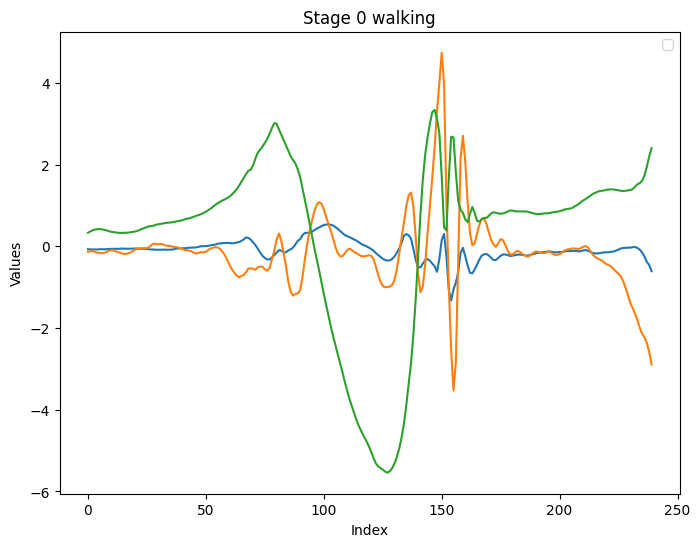

In [ ]:
def plot_side_by_side(data_frame, title):


  plt.figure(figsize=(8, 6))
  plt.plot(data_frame.head(240))
  plt.xlabel('Index')
  plt.ylabel('Values')
  plt.title(title)
  plt.legend()
  plt.show()

plot_side_by_side(df0,'Stage 0 walking')

In [ ]:
import math
def split_dataframe(df, split_size, label):
    # Create an empty list to store the chunks
    chunks = []
    rounded_value = math.floor(len(df)/split_size)
    p=0

    # Split the dataframe into chunks of the specified size
    for i in range(0,rounded_value):
        chunk = df.iloc[p:p+split_size].copy()  # Create a copy of the chunk
          # Assign the specified label to the chunk
        chunks.append(chunk)
        p=p+split_size
    s = len(chunks)

    return chunks , s

In [ ]:
s0 , s = split_dataframe(df0,240,0)
s1 , ss = split_dataframe(df1,240,1)
s2 , sss = split_dataframe(df2,240,2)
s3 , ssss = split_dataframe(df3,240,3)

merged_array = np.concatenate([s0,s1,s2,s3], axis=0)
merged_array.shape

(633, 240, 3)

In [ ]:
import random
my_list = [0] * s + [1] * ss + [2] * sss + [3] * ssss
# Define the lists to shuffle
list1 = merged_array
list2 = my_list

# Zip the lists together
zipped = list(zip(list1, list2))

# Shuffle the zipped list
random.shuffle(zipped)

# Unzip the shuffled list
X,y = zip(*zipped)

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
np.size(X_val)

# Convert X_train, X_test, y_train, y_test to NumPy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
X_val = np.array(X_val)
y_val = np.array(y_val)

In [ ]:
from tensorflow.keras import layers, models, callbacks


# Define the optimized model architecture
model = models.Sequential()
model.add(layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=(240, 3)))
model.add(layers.Conv1D(16,kernel_size=3, activation='relu'))
model.add(layers.MaxPooling1D(pool_size=3))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Define the early stopping callback
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, mode='min', verbose=1, restore_best_weights=True)


model.summary()

Model: "sequential_134"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_331 (Conv1D)         (None, 238, 32)           320       
                                                                 
 conv1d_332 (Conv1D)         (None, 236, 16)           1552      
                                                                 
 max_pooling1d_134 (MaxPooli  (None, 78, 16)           0         
 ng1D)                                                           
                                                                 
 flatten_134 (Flatten)       (None, 1248)              0         
                                                                 
 dropout_219 (Dropout)       (None, 1248)              0         
                                                                 
 dense_366 (Dense)           (None, 128)               159872    
                                                    

Epoch 1/70
13/13 [==============================] - 2s 68ms/step - loss: 1.3727 - accuracy: 0.3441 - val_loss: 1.3212 - val_accuracy: 0.3824
Epoch 2/70
13/13 [==============================] - 1s 43ms/step - loss: 1.2393 - accuracy: 0.4901 - val_loss: 1.2007 - val_accuracy: 0.4510
Epoch 3/70
13/13 [==============================] - 0s 35ms/step - loss: 1.0686 - accuracy: 0.5322 - val_loss: 0.9989 - val_accuracy: 0.5392
Epoch 4/70
13/13 [==============================] - 0s 28ms/step - loss: 0.8584 - accuracy: 0.6139 - val_loss: 0.8240 - val_accuracy: 0.6373
Epoch 5/70
13/13 [==============================] - 0s 24ms/step - loss: 0.6592 - accuracy: 0.7228 - val_loss: 0.7612 - val_accuracy: 0.5980
Epoch 6/70
13/13 [==============================] - 0s 25ms/step - loss: 0.6089 - accuracy: 0.7054 - val_loss: 0.6311 - val_accuracy: 0.7451
Epoch 7/70
13/13 [==============================] - 0s 26ms/step - loss: 0.4904 - accuracy: 0.8119 - val_loss: 0.6078 - val_accuracy: 0.7941
Epoch 8/70
13

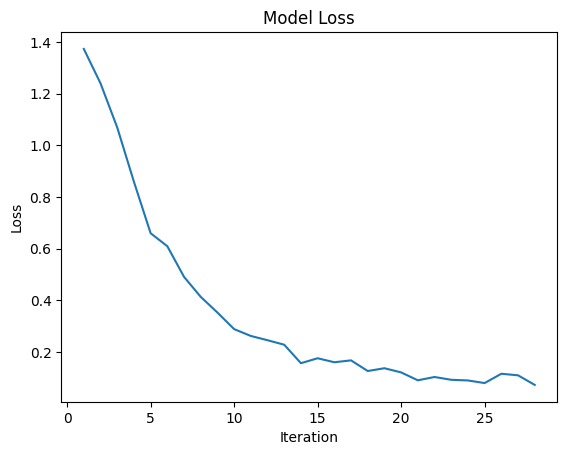

In [ ]:
history = model.fit(X_train, y_train, epochs=70, validation_data=(X_val, y_val),callbacks=[early_stopping])

# Get the number of iterations
iterations = np.arange(1, len(history.history['loss']) + 1)

# Plot loss vs. iterations
plt.plot(iterations, history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

4/4 [==============================] - 0s 12ms/step - loss: 0.4486 - accuracy: 0.8740
Test Loss: 0.4485858678817749
Test Accuracy: 0.874015748500824
4/4 [==============================] - 0s 7ms/step


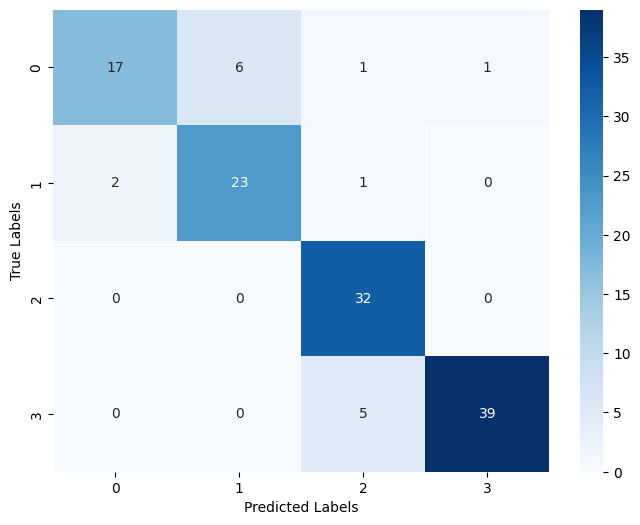

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)



import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get the predicted probabilities
y_pred_probs = model.predict(X_test)
# Get the predicted labels
y_pred = np.argmax(y_pred_probs, axis=1)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model to disk
open("PD_model.tflite", "wb").write(tflite_model)

basic_model_size = os.path.getsize("PD_model.tflite")
print("Model is %d bytes" % basic_model_size)

Model is 120716 bytes


In [ ]:
!echo "const unsigned char model[] = {" > /content/sample_data/model.h
!cat PD_model.tflite | xxd -i      >> /content/sample_data/model.h
!echo "};"                              >> /content/sample_data/model.h

import os
model_h_size = os.path.getsize("model.h")
print(f"Header file, model.h, is {model_h_size:,} bytes.")

Header file, model.h, is 744,450 bytes.


#ANN


##1.Acceleration and Gyroscope

In [ ]:

# Constants
SEED = 1337
SAMPLES_PER_GESTURE = 2*120 # <-- Sample rate of the Arduino Nano 33 BLE IMU

stages = ["S0", "S1","S2", "S3"] # <--- include any new gestures here
num_stages = len(stages) # 2

# create a one-hot encoded matrix that is used in the output
ONE_HOT_ENCODED_GESTURES = np.eye(num_stages)
print(ONE_HOT_ENCODED_GESTURES)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [ ]:
# Reproducability
np.random.seed(SEED)
tf.random.set_seed(SEED)

inputs = []
outputs = []

# read each csv file and push an input and output
for gesture_index in range(num_stages):
  stage = stages[gesture_index]  # "punch"
  output = ONE_HOT_ENCODED_GESTURES[gesture_index]

  df = six_merge_csv_files(stage)

  # calculate the number of gesture recordings in the file
  num_recordings = int(df.shape[0] / SAMPLES_PER_GESTURE)

  print(f"There are {num_recordings} recordings of the {stage} PD (Index #{gesture_index}).")

  for i in range(num_recordings):
    tensor = []
    for j in range(SAMPLES_PER_GESTURE):
      index = i * SAMPLES_PER_GESTURE + j
      # Normalizing the data
      # between -4 and +4 for Acceleration
      # between -2000 and 2000 for gyroscopic data
      tensor += [
          (df['Acceleration x (m/s^2)'][index])+
          (df['Acceleration y (m/s^2)'][index])+
          (df['Acceleration z (m/s^2)'][index]),
          (df['Gyroscope x (rad/s)'][index])+
          (df['Gyroscope y (rad/s)'][index])+
          (df['Gyroscope z (rad/s)'][index])
      ]

    inputs.append(tensor)
    outputs.append(output)

# convert the list to numpy array
inputs = np.array(inputs)
outputs = np.array(outputs)


There are 112 recordings of the S0 PD (Index #0).
There are 133 recordings of the S1 PD (Index #1).
There are 179 recordings of the S2 PD (Index #2).
There are 209 recordings of the S3 PD (Index #3).


In [ ]:
np.shape(inputs)
print(np.shape(inputs))

(633, 480)


In [ ]:
inputs_count = len(inputs)
randomize = np.arange(inputs_count)
print(randomize)
np.random.shuffle(randomize)
print(randomize)

inputs = inputs[randomize]
outputs = outputs[randomize]

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [ ]:
# Split the recordings (group of samples) into three sets: training, testing and validation
TRAIN_SPLIT = int(0.6 * inputs_count)
TEST_SPLIT = int(0.2 * inputs_count + TRAIN_SPLIT)

print(TRAIN_SPLIT)
print(TEST_SPLIT)

X_train, X_test, X_validate = np.split(inputs, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_test, y_validate = np.split(outputs, [TRAIN_SPLIT, TEST_SPLIT])

print(len(X_test))

print("Data set randomization and splitting complete.")
print(np.shape(X_train))
train_df = pd.DataFrame(X_train)

379
505
126
Data set randomization and splitting complete.
(379, 480)


In [ ]:
from tensorflow.keras import layers, models, callbacks

# Define the optimized model architecture
model = models.Sequential()
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='mse', metrics=['mae', 'accuracy'])
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, mode='min', verbose=1, restore_best_weights=True)

Epoch 1/50
379/379 [==============================] - 2s 4ms/step - loss: 0.3628 - mae: 0.3630 - accuracy: 0.2744 - val_loss: 0.3672 - val_mae: 0.3672 - val_accuracy: 0.2656
Epoch 2/50
379/379 [==============================] - 1s 4ms/step - loss: 0.3628 - mae: 0.3628 - accuracy: 0.2744 - val_loss: 0.3672 - val_mae: 0.3672 - val_accuracy: 0.2656
Epoch 3/50
379/379 [==============================] - 1s 4ms/step - loss: 0.3628 - mae: 0.3628 - accuracy: 0.2744 - val_loss: 0.3672 - val_mae: 0.3672 - val_accuracy: 0.2656
Epoch 4/50
379/379 [==============================] - 1s 4ms/step - loss: 0.3628 - mae: 0.3628 - accuracy: 0.2744 - val_loss: 0.3672 - val_mae: 0.3672 - val_accuracy: 0.2656
Epoch 5/50
379/379 [==============================] - 2s 5ms/step - loss: 0.3628 - mae: 0.3628 - accuracy: 0.2744 - val_loss: 0.3672 - val_mae: 0.3672 - val_accuracy: 0.2656
Epoch 6/50
379/379 [==============================] - 2s 5ms/step - loss: 0.3628 - mae: 0.3628 - accuracy: 0.2744 - val_loss: 0.36

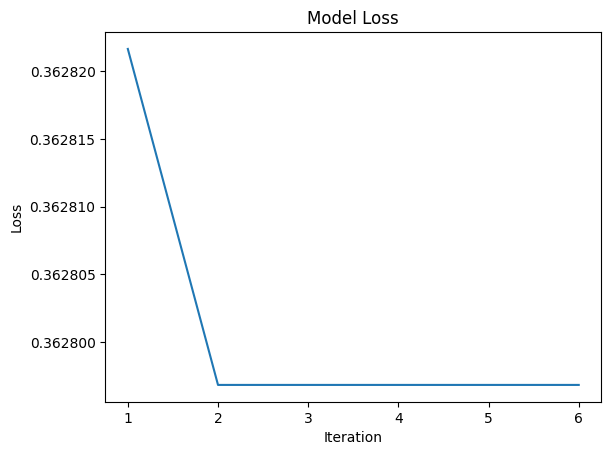

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=1, validation_data=(X_validate, y_validate),callbacks=[early_stopping])

# Get the number of iterations
iterations = np.arange(1, len(history.history['loss']) + 1)

# Plot loss vs. iterations
plt.plot(iterations, history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

4/4 [==============================] - 0s 3ms/step
predictions =
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
actual =
 [2 2 0 2 2 3 2 3 3 0 1 3 0 2 1 2 2 2 2 2 0 3 0 2 2 0 2 1 3 2 2 1 1 0 1 1 1
 2 2 0 1 3 1 1 0 3 2 2 0 2 3 3 3 2 1 2 1 2 3 3 0 1 2 0 2 1 3 3 3 2 2 1 1 2
 2 3 3 0 1 0 2 3 1 3 3 1 2 3 1 3 0 0 0 2 3 2 3 2 2 3 0 1 0 1 2 3 2 0 1 1 2
 2 1 1 1 1 1 0 0 1 1 3 2 0 1 3]


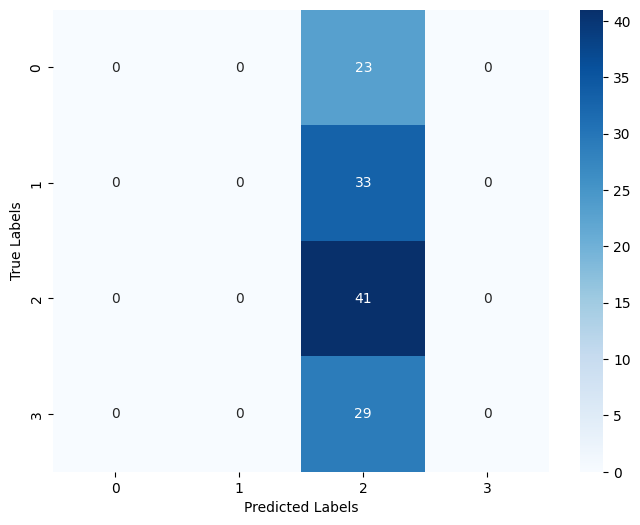

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)

# print the predictions and the expected outputs
y_pred_labels = np.argmax(y_pred, axis=1)
y_actual_labels = np.argmax(y_test, axis=1)
print("predictions =\n", y_pred_labels)
print("actual =\n", y_actual_labels)

# Create the confusion matrix
cm = confusion_matrix(y_actual_labels, y_pred_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(modelA)
tflite_model = converter.convert()

# Save the model to disk
open("PD_model.tflite", "wb").write(tflite_model)

basic_model_size = os.path.getsize("PD_model.tflite")
print("Model is %d bytes" % basic_model_size)

Model is 811112 bytes


In [ ]:
!echo "const unsigned char model[] = {" > /content/sample_data/model.h
!cat PD_model.tflite | xxd -i      >> /content/sample_data/model.h
!echo "};"                              >> /content/sample_data/model.h

import os
model_h_size = os.path.getsize("model.h")
print(f"Header file, model.h, is {model_h_size:,} bytes.")

Header file, model.h, is 5,001,892 bytes.


##2.Accelerometer Only

In [ ]:
# Constants
SEED = 1337
SAMPLES_PER_GESTURE = 2*120 # <-- Sample rate of the Arduino Nano 33 BLE IMU

stages = ["S0", "S1","S2", "S3"] # <--- include any new gestures here
num_stages = len(stages) # 2

# create a one-hot encoded matrix that is used in the output
ONE_HOT_ENCODED_GESTURES = np.eye(num_stages)
print(ONE_HOT_ENCODED_GESTURES)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [ ]:
# Reproducability
np.random.seed(SEED)
tf.random.set_seed(SEED)

inputs = []
outputs = []

# read each csv file and push an input and output
for gesture_index in range(num_stages):
  stage = stages[gesture_index]  # "punch"
  output = ONE_HOT_ENCODED_GESTURES[gesture_index]

  df = six_merge_csv_files(stage)

  # calculate the number of gesture recordings in the file
  num_recordings = int(df.shape[0] / SAMPLES_PER_GESTURE)

  print(f"There are {num_recordings} recordings of the {stage} PD (Index #{gesture_index}).")

  for i in range(num_recordings):
    tensor = []
    for j in range(SAMPLES_PER_GESTURE):
      index = i * SAMPLES_PER_GESTURE + j
      # Normalizing the data
      # between -4 and +4 for Acceleration
      # between -2000 and 2000 for gyroscopic data
      tensor += [
          (df['Acceleration x (m/s^2)'][index])+
          (df['Acceleration y (m/s^2)'][index])+
          (df['Acceleration z (m/s^2)'][index])
      ]

    inputs.append(tensor)
    outputs.append(output)

# convert the list to numpy array
inputs = np.array(inputs)
outputs = np.array(outputs)

There are 112 recordings of the S0 PD (Index #0).
There are 133 recordings of the S1 PD (Index #1).
There are 179 recordings of the S2 PD (Index #2).
There are 209 recordings of the S3 PD (Index #3).


In [ ]:
np.shape(inputs)
print(np.shape(inputs))

(633, 240)


In [ ]:
inputs_count = len(inputs)
randomize = np.arange(inputs_count)
print(randomize)
np.random.shuffle(randomize)
print(randomize)

inputs = inputs[randomize]
outputs = outputs[randomize]

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [ ]:
# Split the recordings (group of samples) into three sets: training, testing and validation
TRAIN_SPLIT = int(0.6 * inputs_count)
TEST_SPLIT = int(0.2 * inputs_count + TRAIN_SPLIT)

print(TRAIN_SPLIT)
print(TEST_SPLIT)

X_train, X_test, X_validate = np.split(inputs, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_test, y_validate = np.split(outputs, [TRAIN_SPLIT, TEST_SPLIT])

print(len(X_test))

print("Data set randomization and splitting complete.")
print(np.shape(X_train))
train_df = pd.DataFrame(X_train)

379
505
126
Data set randomization and splitting complete.
(379, 240)


In [ ]:
from tensorflow.keras import layers, models, callbacks

# build the model and train it
modelA = tf.keras.Sequential()
modelA.add(tf.keras.layers.Dense(256, activation='relu')) # relu is used for performance
modelA.add(tf.keras.layers.Dense(64, activation='relu'))
modelA.add(tf.keras.layers.Dense(16, activation='relu'))
modelA.add(tf.keras.layers.Dense(4, activation='softmax')) # softmax is used, because we only expect one gesture to occur per input
modelA.compile(optimizer='adam', loss='mse', metrics=['mae', 'accuracy'])
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, mode='min', verbose=1, restore_best_weights=True)

Epoch 1/50
379/379 [==============================] - 3s 4ms/step - loss: 0.3630 - mae: 0.3634 - accuracy: 0.2744 - val_loss: 0.3672 - val_mae: 0.3672 - val_accuracy: 0.2656
Epoch 2/50
379/379 [==============================] - 2s 6ms/step - loss: 0.3628 - mae: 0.3628 - accuracy: 0.2744 - val_loss: 0.3672 - val_mae: 0.3672 - val_accuracy: 0.2656
Epoch 3/50
379/379 [==============================] - 2s 5ms/step - loss: 0.3628 - mae: 0.3628 - accuracy: 0.2744 - val_loss: 0.3672 - val_mae: 0.3672 - val_accuracy: 0.2656
Epoch 4/50
379/379 [==============================] - 1s 4ms/step - loss: 0.3628 - mae: 0.3628 - accuracy: 0.2744 - val_loss: 0.3672 - val_mae: 0.3672 - val_accuracy: 0.2656
Epoch 5/50
379/379 [==============================] - 1s 4ms/step - loss: 0.3628 - mae: 0.3628 - accuracy: 0.2744 - val_loss: 0.3672 - val_mae: 0.3672 - val_accuracy: 0.2656
Epoch 6/50
379/379 [==============================] - 1s 3ms/step - loss: 0.3628 - mae: 0.3628 - accuracy: 0.2744 - val_loss: 0.36

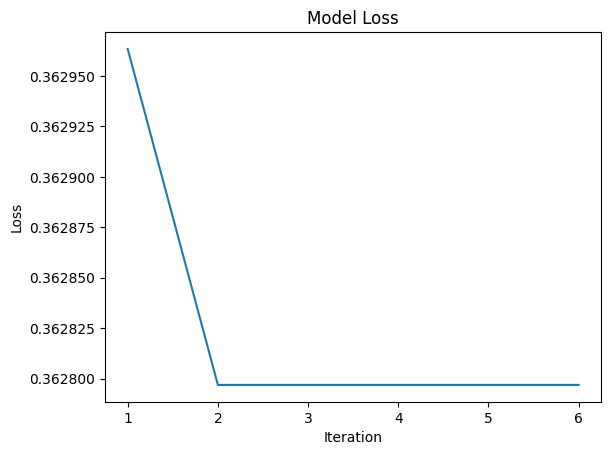

In [ ]:
history = modelA.fit(X_train, y_train, epochs=50, batch_size=1, validation_data=(X_validate, y_validate),callbacks=[early_stopping])

# Get the number of iterations
iterations = np.arange(1, len(history.history['loss']) + 1)

# Plot loss vs. iterations
plt.plot(iterations, history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

4/4 [==============================] - 0s 3ms/step
predictions =
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
actual =
 [2 2 0 2 2 3 2 3 3 0 1 3 0 2 1 2 2 2 2 2 0 3 0 2 2 0 2 1 3 2 2 1 1 0 1 1 1
 2 2 0 1 3 1 1 0 3 2 2 0 2 3 3 3 2 1 2 1 2 3 3 0 1 2 0 2 1 3 3 3 2 2 1 1 2
 2 3 3 0 1 0 2 3 1 3 3 1 2 3 1 3 0 0 0 2 3 2 3 2 2 3 0 1 0 1 2 3 2 0 1 1 2
 2 1 1 1 1 1 0 0 1 1 3 2 0 1 3]


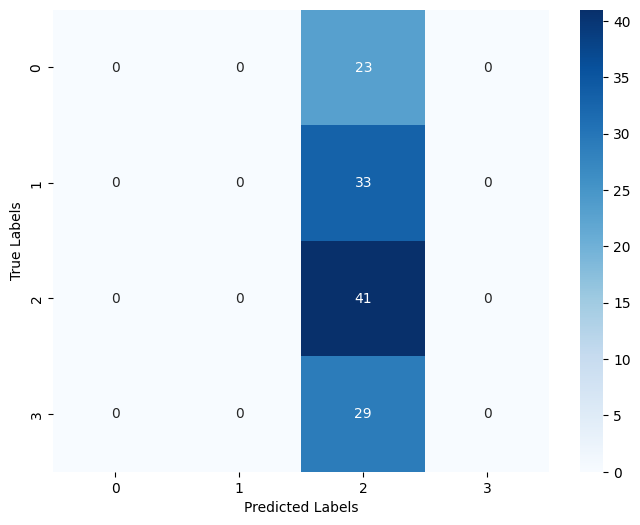

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = modelA.predict(X_test)

# print the predictions and the expected outputs
y_pred_labels = np.argmax(y_pred, axis=1)
y_actual_labels = np.argmax(y_test, axis=1)
print("predictions =\n", y_pred_labels)
print("actual =\n", y_actual_labels)

# Create the confusion matrix
cm = confusion_matrix(y_actual_labels, y_pred_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Model conversion

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(modelA)
tflite_model = converter.convert()

# Save the model to disk
open("ANN_model.tflite", "wb").write(tflite_model)

import os
basic_model_size = os.path.getsize("ANN_model.tflite")
print("Model is %d bytes" % basic_model_size)

Model is 811128 bytes


In [ ]:
!echo "const unsigned char model[] = {" > /content/sample_data/modelA.h
!cat ANN_model.tflite | xxd -i      >> /content/sample_data/modelA.h
!echo "};"                              >> /content/sample_data/modelA.h

import os
model_h_size = os.path.getsize("modelA.h")
print(f"Header file, modelA.h, is {model_h_size:,} bytes.")

Header file, modelA.h, is 5,001,990 bytes.


# Spectogram Approach

In [ ]:
def merge_csv_files(folder):
    # Create an empty list to store the dataframes
    dataframes_acc = []
    folder_path = os.path.join(os.getcwd(), folder)
    os.chdir(folder_path)

    files = os.listdir()

    csv_files_acc = [file for file in files if file.endswith('meter.csv')]

    # Iterate over the folders
    for file in csv_files_acc:

            # Read the CSV file into a dataframe
            df_acc = pd.read_csv(file, sep='\t',usecols=lambda column: column != 'Time (s)')

            # Remove first and last 200 rows
            df_acc = df_acc.iloc[200:-200]

            # Add the dataframe to the list
            dataframes_acc.append(df_acc)


    # Merge the dataframes
    merged_df_acc = pd.concat(dataframes_acc, axis=0)  # Select all columns using axis=0
     # Reset the index
    merged_df_acc.reset_index(drop=True, inplace=True)


    os.chdir('..')
    return merged_df_acc

In [ ]:
df0 = merge_csv_files('S0')
df1 = merge_csv_files('S1')
df2 = merge_csv_files('S2')
df3 = merge_csv_files('S3')
df0

,Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2)
0,-2.379662,14.200804,0.503689
1,-2.580061,12.492329,0.860818
2,-2.021935,11.659028,1.436890
3,-1.031307,11.635698,2.010569
4,0.113659,11.889935,2.362912
...,...,...,...
27066,-2.399403,8.587242,1.532603
27067,-2.062015,8.592627,1.621137
27068,-2.053640,8.750552,1.810768
27069,-2.411965,8.932407,1.880759


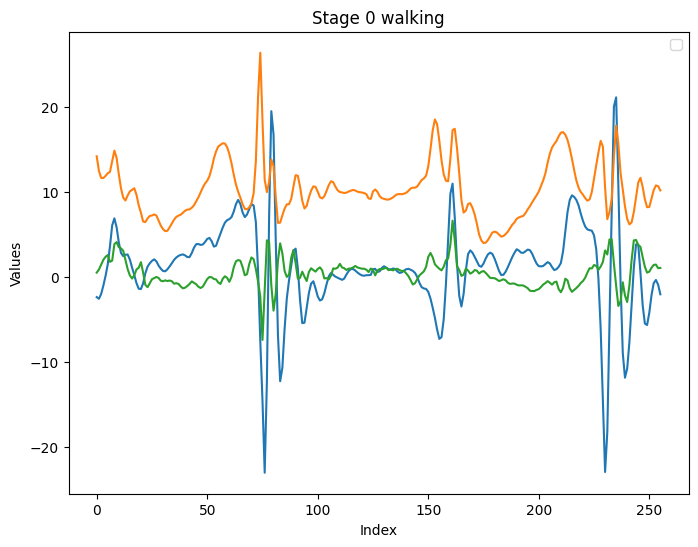

In [ ]:
def plot_side_by_side(data_frame, title):


  plt.figure(figsize=(8, 6))
  plt.plot(data_frame.head(256))
  plt.xlabel('Index')
  plt.ylabel('Values')
  plt.title(title)
  plt.legend()
  plt.show()

plot_side_by_side(df0,'Stage 0 walking')

In [ ]:
import math
def split_dataframe(df, split_size, label):
    # Create an empty list to store the chunks
    chunks = []
    rounded_value = math.floor(len(df)/split_size)
    p=0

    # Split the dataframe into chunks of the specified size
    for i in range(0,rounded_value):
        chunk = df.iloc[p:p+split_size].copy()  # Create a copy of the chunk
          # Assign the specified label to the chunk
        chunks.append(chunk)
        p=p+split_size
    s = len(chunks)

    return chunks , s

In [ ]:
s0 , s = split_dataframe(df0,256,0)
s1 , ss = split_dataframe(df1,256,1)
s2 , sss = split_dataframe(df2,256,2)
s3 , ssss = split_dataframe(df3,256,3)

merged_array = np.concatenate([s0,s1,s2,s3], axis=0)
merged_array.shape

(594, 256, 3)

In [ ]:
import random
my_list = [0] * s + [1] * ss + [2] * sss + [3] * ssss
# Define the lists to shuffle
list1 = merged_array
list2 = my_list

# Zip the lists together
zipped = list(zip(list1, list2))

# Shuffle the zipped list
random.shuffle(zipped)

# Unzip the shuffled list
X,y = zip(*zipped)

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
np.size(X_val)

# Convert X_train, X_test, y_train, y_test to NumPy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
X_val = np.array(X_val)
y_val = np.array(y_val)

In [ ]:
# Assuming your 3D data is stored in a variable called "data"
# Shape of data: (time_steps, frequency_bins, amplitude_values)

spectrogram1 = np.abs(np.fft.fftshift(df0.head(240))) ** 2
spectrogram2 = np.abs(np.fft.fftshift(df1.head(240))) ** 2
spectrogram3 = np.abs(np.fft.fftshift(df2.head(240))) ** 2
spectrogram4 = np.abs(np.fft.fftshift(df3.head(240))) ** 2

# Log-scale the spectrograms for better visualization
spectrogram1 = 10 * np.log10(spectrogram1)
spectrogram2 = 10 * np.log10(spectrogram2)
spectrogram3 = 10 * np.log10(spectrogram3)
spectrogram4 = 10 * np.log10(spectrogram4)

# Set the colormap and its dynamic range
cmap = plt.get_cmap('jet')
vmin = np.percentile(spectrogram, 5)  # Set the minimum intensity percentile
vmax = np.percentile(spectrogram, 95)  # Set the maximum intensity percentile

cmap = plt.get_cmap('jet')
vmin = np.percentile(np.concatenate([spectrogram1, spectrogram2, spectrogram3, spectrogram4]), 5)
vmax = np.percentile(np.concatenate([spectrogram1, spectrogram2, spectrogram3, spectrogram4]), 95)

# Create a grid of subplots with 2 rows and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each spectrogram in a separate subplot
for i, spectrogram in enumerate([spectrogram1, spectrogram2, spectrogram3, spectrogram4]):
    ax = axes[i]  # Get the current subplot
    ax.imshow(spectrogram, aspect='auto', cmap=cmap, vmin=vmin, vmax=vmax)
    ax.set_xlabel('Frequency')
    ax.set_ylabel('Time')
    ax.set_title(f'Spectrogram {i+1}')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
def get_spectrogram(waveform):
    # Convert the waveform to a spectrogram via a STFT.
    spectrogram = tf.signal.stft(waveform, frame_shape=(255, 255), frame_step=(128, 128))
    # Obtain the magnitude of the STFT.
    spectrogram = tf.abs(spectrogram)
    # Add a `channels` dimension, so that the spectrogram can be used
    # as image-like input data with convolution layers (which expect
    # shape (`batch_size`, `height`, `width`, `channels`).
    spectrogram = spectrogram[..., tf.newaxis]
    return spectrogram

In [ ]:
for i in range(3):
  label = y[i]
  waveform = X[i]
  spectrogram = get_spectrogram(waveform)

TypeError: ignored

In [ ]:
def plot_spectrogram(spectrogram, ax):
  if len(spectrogram.shape) > 2:
    spectrogram = np.squeeze(spectrogram, axis=-1)
  # Convert the frequencies to log scale and transpose, so that the time is
  # represented on the x-axis (columns).
  # Add an epsilon to avoid taking a log of zero.
  log_spec = np.log(spectrogram.T + np.finfo(float).eps)
  print("Spectrogram shape:", log_spec.shape)
  height = log_spec.shape[0]
  width = log_spec.shape[1]
  X = np.linspace(0, np.size(spectrogram), num=width, dtype=int) # Array with values in an interval
  Y = range(height)
  ax.pcolormesh(X, Y, log_spec)

In [ ]:
fig, axes = plt.subplots(2, figsize=(12, 8))
timescale = np.arange(waveform.shape[0])
axes[0].plot(timescale, waveform.numpy())
axes[0].set_title('Waveform')
axes[0].set_xlim([0, 16000])

plot_spectrogram(spectrogram.numpy(), axes[1])
axes[1].set_title('Spectrogram')
plt.suptitle(label.title())
plt.show()